## Lead Scoring Case Study



### Importing and Merging Data

In [3]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing all datasets
lead_data = pd.read_csv(r"C:\Users\anind\Desktop\PGDS\LeadScore\Leads.csv")


In [6]:
print(len(lead_data))


9240


### Let's understand the structure of our dataframe

In [7]:
# Let's see the head of our master dataset
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Delete colums which have more than 50 % null values
df2=lead_data.dropna(thresh=int(lead_data.shape[0] * .5), axis=1)
print(df2.shape)

(9240, 36)


In [13]:
df2.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

###### Visualising Categorical Variables
Let's make a boxplot for some of these variables.

In [23]:
df2['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

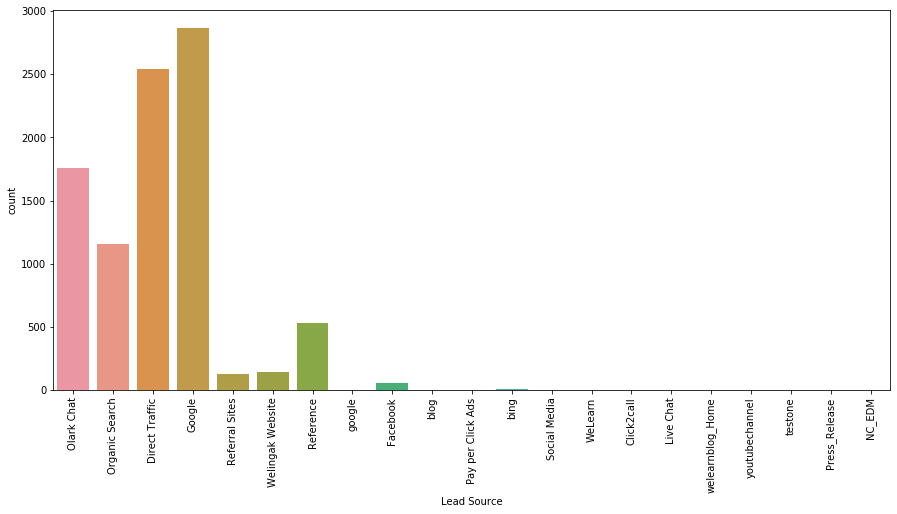

In [22]:


fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(df2['Lead Source'])
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

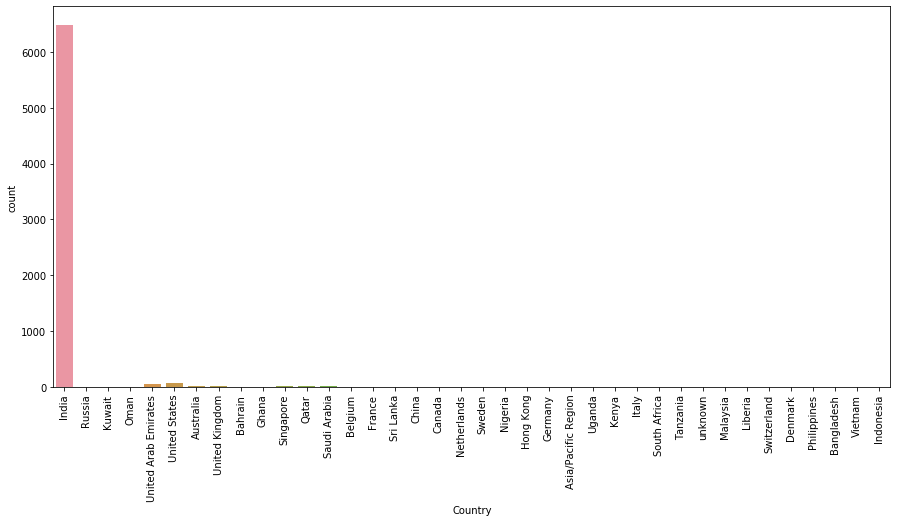

In [24]:
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(df2['Country'])
xticks(rotation = 90)

###### Observation - As most of the data is coming from India , we are not considering this variable in model building 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

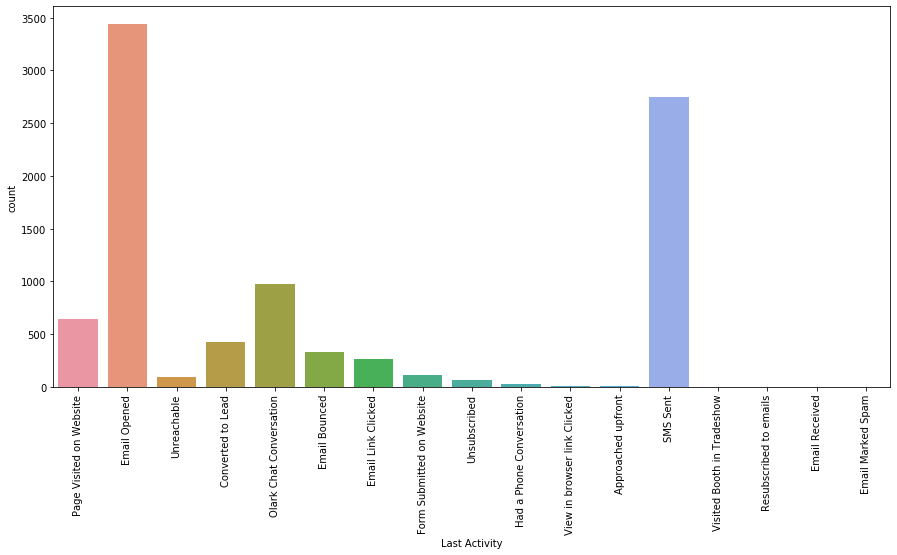

In [25]:
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(df2['Last Activity'])
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

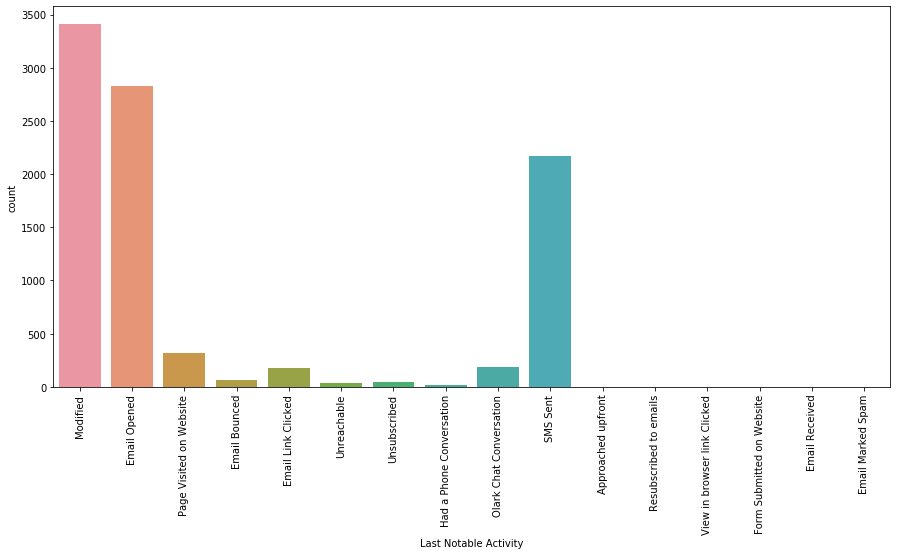

In [26]:
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(df2['Last Notable Activity'])
xticks(rotation = 90)

###### Last Notable activity and Last activity values found almost similiar : As Last Notable Activity is having 0 null value, taking this one for model 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

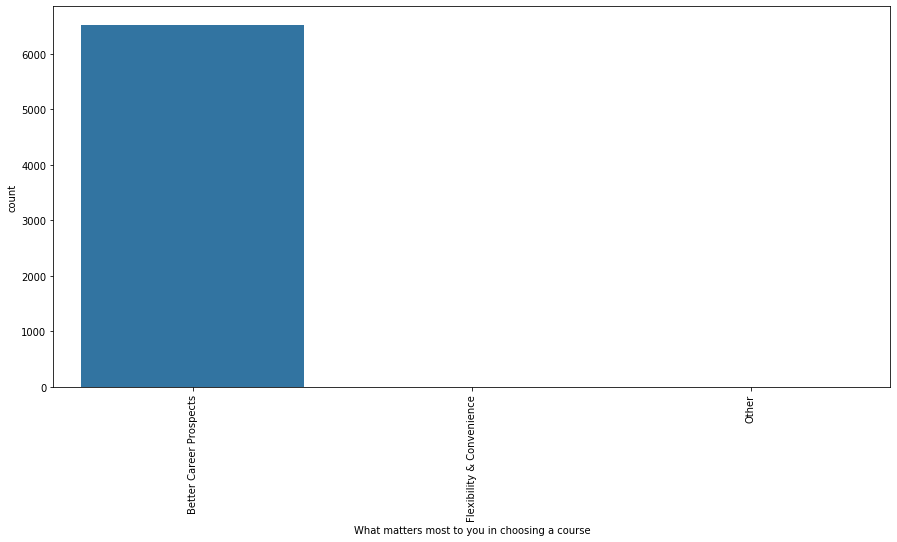

In [31]:
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(df2['What matters most to you in choosing a course'])
xticks(rotation = 90)

###### From the above graph most of the values are 'Better Carrer Prospect ' and it has many null values . So will not take this column for model building


##### Null Value Imputation 

In [29]:
df2['TotalVisits'].fillna((df2['TotalVisits'].mean()), inplace=True)

### Data Preparation

In [17]:
# Converting Yes to 1 and No to 0
df2['Search'] = df2['Search'].map({'Yes': 1, 'No': 0})
df2['Magazine'] = df2['Magazine'].map({'Yes': 1, 'No': 0})
df2['Newspaper Article'] = df2['Newspaper Article'].map({'Yes': 1, 'No': 0})
df2['X Education Forums'] =df2['X Education Forums'].map({'Yes': 1, 'No': 0})
df2['Newspaper'] = df2['Newspaper'].map({'Yes': 1, 'No': 0})
df2['Digital Advertisement'] = df2['Digital Advertisement'].map({'Yes': 1, 'No': 0})
df2['Through Recommendations'] = df2['Through Recommendations'].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

In [18]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(df2['Lead Source'],prefix='Lead Source ',drop_first=True)
#Adding the results to the master dataframe
df2 = pd.concat([df2,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(df2['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
df2= pd.concat([df2,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(df2['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
df2 = pd.concat([df2,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(df2['What is your current occupation'],prefix='What is your current occupation')
#  dropping MultipleLines_No phone service column
# ml1 = ml.drop(['What is your current occupation'],1)
#Adding the results to the master dataframe
df2 = pd.concat([df2,ml],axis=1)



In [30]:
df2.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [28]:
# Checking for unique values 
df2.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        42
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
Lead Profile                                        6
What is your current occupation                     6
Lead Origin                                         5
Asymmetrique Profile Index  

### Dropping the repeated variables

In [ ]:
# Dropping columns with only one value
'Receive More Updates About Our Courses','Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque'

In [20]:
# We have created dummies for the below variables, so we can drop them
df3 = df2.drop(['Prospect ID','Lead Number','Lead Origin', 'Lead Source' ,'Do Not Email' ,'Do Not Call','Last Activity','Country','Specialization' ,'How did you hear about X Education' ,'What is your current occupation' ,'What matters most to you in choosing a course','Last Notable Activity' ], 1)

In [21]:
df4 = df3.drop([,'Tags','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',,'A free copy of Mastering The Interview','Search','Magazine','Newspaper Article','X Education Forums','Newspaper'], 1)

In [22]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
Converted                                               9240 non-null int64
TotalVisits                                             9240 non-null float64
Total Time Spent on Website                             9240 non-null int64
Page Views Per Visit                                    9103 non-null float64
Digital Advertisement                                   9240 non-null int64
Through Recommendations                                 9240 non-null int64
Lead Source _Direct Traffic                             9240 non-null uint8
Lead Source _Facebook                                   9240 non-null uint8
Lead Source _Google                                     9240 non-null uint8
Lead Source _Live Chat                                  9240 non-null uint8
Lead Source _NC_EDM                                     9240 non-null uint8
Lead Source _Olark Chat                              

In [23]:
df4.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Digital Advertisement,Through Recommendations,Lead Source _Direct Traffic,Lead Source _Facebook,Lead Source _Google,Lead Source _Live Chat,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Now we can see we have all variables as integer.

### Checking for Outliers

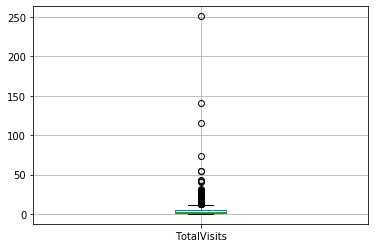

In [24]:
# Checking for outliers in the continuous variables

df4.boxplot(column=['TotalVisits'], return_type='axes');

In [25]:
# removing (statistical) outliers
Q1 = df4.TotalVisits.quantile(0.1)
Q3 = df4.TotalVisits.quantile(0.90)
IQR = Q3 - Q1
df_final = df4[(df4.TotalVisits >= Q1 - 1.5*IQR) & (df4.TotalVisits <= Q3 + 1.5*IQR)]

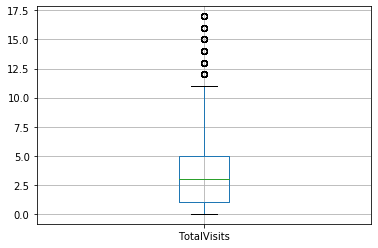

In [26]:
df_final.boxplot(column=['TotalVisits'], return_type='axes');

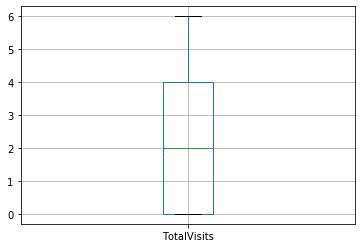

In [27]:


q = df4["TotalVisits"].quantile(0.90)
df5=df4[df4["TotalVisits"] < q]
df5.boxplot(column=['TotalVisits'], return_type='axes');

In [28]:
df6.boxplot(column=['Total Time Spent on Website'], return_type='axes');

NameError: name 'df6' is not defined

In [ ]:
df5.info()

In [29]:
# Checking the percentage of missing values
round(100*(df5.isnull().sum()/len(df5.index)), 2)

Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    1.7
Digital Advertisement                                   0.0
Through Recommendations                                 0.0
Lead Source _Direct Traffic                             0.0
Lead Source _Facebook                                   0.0
Lead Source _Google                                     0.0
Lead Source _Live Chat                                  0.0
Lead Source _NC_EDM                                     0.0
Lead Source _Olark Chat                                 0.0
Lead Source _Organic Search                             0.0
Lead Source _Pay per Click Ads                          0.0
Lead Source _Press_Release                              0.0
Lead Source _Reference                                  0.0
Lead Source _Referral Sites             

In [30]:
# Removing NaN TotalCharges rows
df6 = df5[~np.isnan(df5['Page Views Per Visit'])]

In [31]:
# Checking percentage of missing values after removing the missing values
round(100*(df6.isnull().sum()/len(df6.index)), 2)

Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Digital Advertisement                                   0.0
Through Recommendations                                 0.0
Lead Source _Direct Traffic                             0.0
Lead Source _Facebook                                   0.0
Lead Source _Google                                     0.0
Lead Source _Live Chat                                  0.0
Lead Source _NC_EDM                                     0.0
Lead Source _Olark Chat                                 0.0
Lead Source _Organic Search                             0.0
Lead Source _Pay per Click Ads                          0.0
Lead Source _Press_Release                              0.0
Lead Source _Reference                                  0.0
Lead Source _Referral Sites             

Now we don't have any missing values

In [32]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939 entries, 0 to 9239
Data columns (total 51 columns):
Converted                                               7939 non-null int64
TotalVisits                                             7939 non-null float64
Total Time Spent on Website                             7939 non-null int64
Page Views Per Visit                                    7939 non-null float64
Digital Advertisement                                   7939 non-null int64
Through Recommendations                                 7939 non-null int64
Lead Source _Direct Traffic                             7939 non-null uint8
Lead Source _Facebook                                   7939 non-null uint8
Lead Source _Google                                     7939 non-null uint8
Lead Source _Live Chat                                  7939 non-null uint8
Lead Source _NC_EDM                                     7939 non-null uint8
Lead Source _Olark Chat                              

##### Checking the Cconvertion Rate

In [35]:
Conv = (sum(df6['Converted'])/len(df6['Converted'].index))*100
Conv

37.04496788008566

We have almost 37% coversion rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [36]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df6.drop(['Converted'],axis=1)

# Putting response variable to y
y = df6['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Feature Standardisation

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit' ]])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Digital Advertisement,Through Recommendations,Lead Source _Direct Traffic,Lead Source _Facebook,Lead Source _Google,Lead Source _Live Chat,Lead Source _NC_EDM,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
5830,-1.252902,-0.836858,-1.195231,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5517,-0.197437,-0.571675,0.002529,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2283,-0.197437,1.126977,0.002529,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1545,-1.252902,-0.836858,-1.195231,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5166,-1.252902,-0.836858,-1.195231,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Running Your First Training Model

In [40]:
import statsmodels.api as sm

In [41]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5557
Model:                            GLM   Df Residuals:                     5513
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 Jan 2020   Deviance:                          nan
Time:                        11:38:05   Pearson chi2:                 6.05e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 4.506e+15   7.98e+07   5.65e+07      0.000    4.51e+15    4.51e+15
TotalVisits                                          -3.903e+13   2.06e+06  -1.89e+07      0.000    -3.9e+13    -3.9e+13
Total Time Spent on Website                           8.604e+14   1.06e+06   8.14e+08      0.000     8.6e+14     8.6e+14
Page Views Per Visit                                 -1.507e+13      2e+06  -7.52e+06      0.000   -1.51e+13   -1.51e+13
Digital Advertisement                                -2.846e+15   6.72e+07  -4.24e+07      0.000   -2.85e+15   -2.85e+15
Through Recommendations                               6.314e+14   4.76e+07   1.33e+07      0.000    6.31e+14    6.31e+14
Lead Source _Direct Traffic                          -1.885e+15   4.31e+07  -4.37e+07      0.000   -1.88e+15   -1.88e+15
Lead Source _Facebook                                -6.162e+14   5.27e+07  -1.17e+07      0.000   -6.16e+14   -6.16e+14
Lead Source _Google                                  -1.769e+15   4.31e+07   -4.1e+07      0.000   -1.77e+15   -1.77e+15
Lead Source _Live Chat                               -1.062e+15   5.01e+07  -2.12e+07      0.000   -1.06e+15   -1.06e+15
Lead Source _NC_EDM                                    -15.8005   6.61e-07  -2.39e+07      0.000     -15.800     -15.800
Lead Source _Olark Chat                              -1.484e+15   4.31e+07  -3.44e+07      0.000   -1.48e+15   -1.48e+15
Lead Source _Organic Search                          -1.877e+15   4.32e+07  -4.34e+07      0.000   -1.88e+15   -1.88e+15
Lead Source _Pay per Click Ads                       -5.586e+15   7.98e+07     -7e+07      0.000   -5.59e+15   -5.59e+15
Lead Source _Press_Release                           -5.998e+15   7.99e+07  -7.51e+07      0.000      -6e+15      -6e+15
Lead Source _Reference                                2.028e+14   1.65e+07   1.23e+07      0.000    2.03e+14    2.03e+14
Lead Source _Referral Sites                          -1.822e+15    4.4e+07  -4.14e+07      0.000   -1.82e+15   -1.82e+15
Lead Source _Social Media                            -1.964e+15   6.41e+07  -3.06e+07      0.000   -1.96e+15   -1.96e+15
Lead Source _WeLearn                                 -2.802e+15   7.98e+07  -3.51e+07      0.000    -2.8e+15    -2.8e+15
Lead Source _Welingak Website                         1.951e+13   1.74e+07   1.12e+06      0.000    1.95e+13    1.95e+13
Lead Source _bing                                    -2.102e+15   5.25e+07     -4e+07      0.000    -2.1e+15    -2.1e+15
Lead Source _blog                                    -6.111e+15   7.98e+07  -7.66e+07      0.000   -6.11e+15   -6.11e+15
Lead Source _google                                     25

### Correlation Matrix

In [42]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

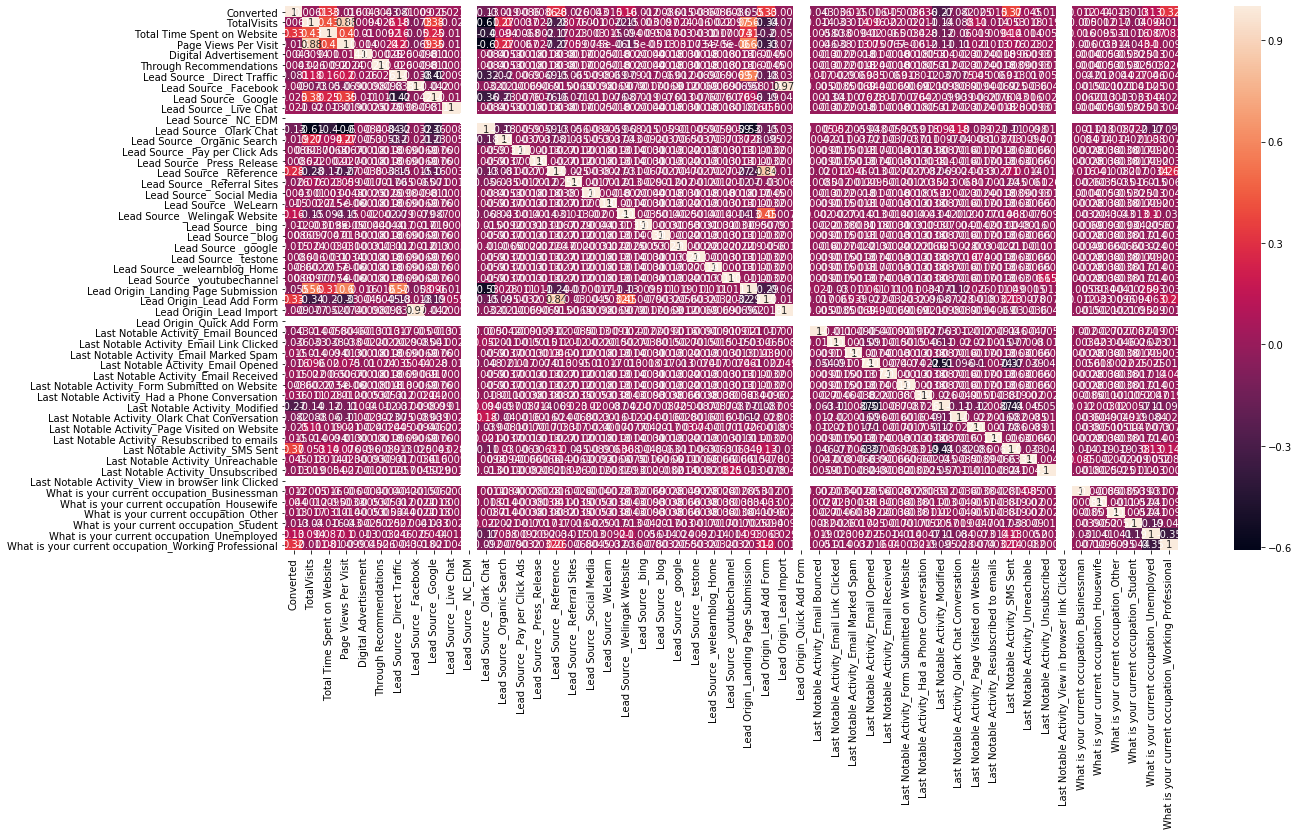

In [43]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df6.corr(),annot = True)

### Dropping highly correlated variables.

In [44]:
X_test1 = X_test.drop(['Lead Origin_Quick Add Form','Lead Source _NC_EDM','Lead Source _Facebook','Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)
X_train1 = X_train.drop(['Lead Origin_Quick Add Form','Lead Source _NC_EDM','Lead Source _Facebook','Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

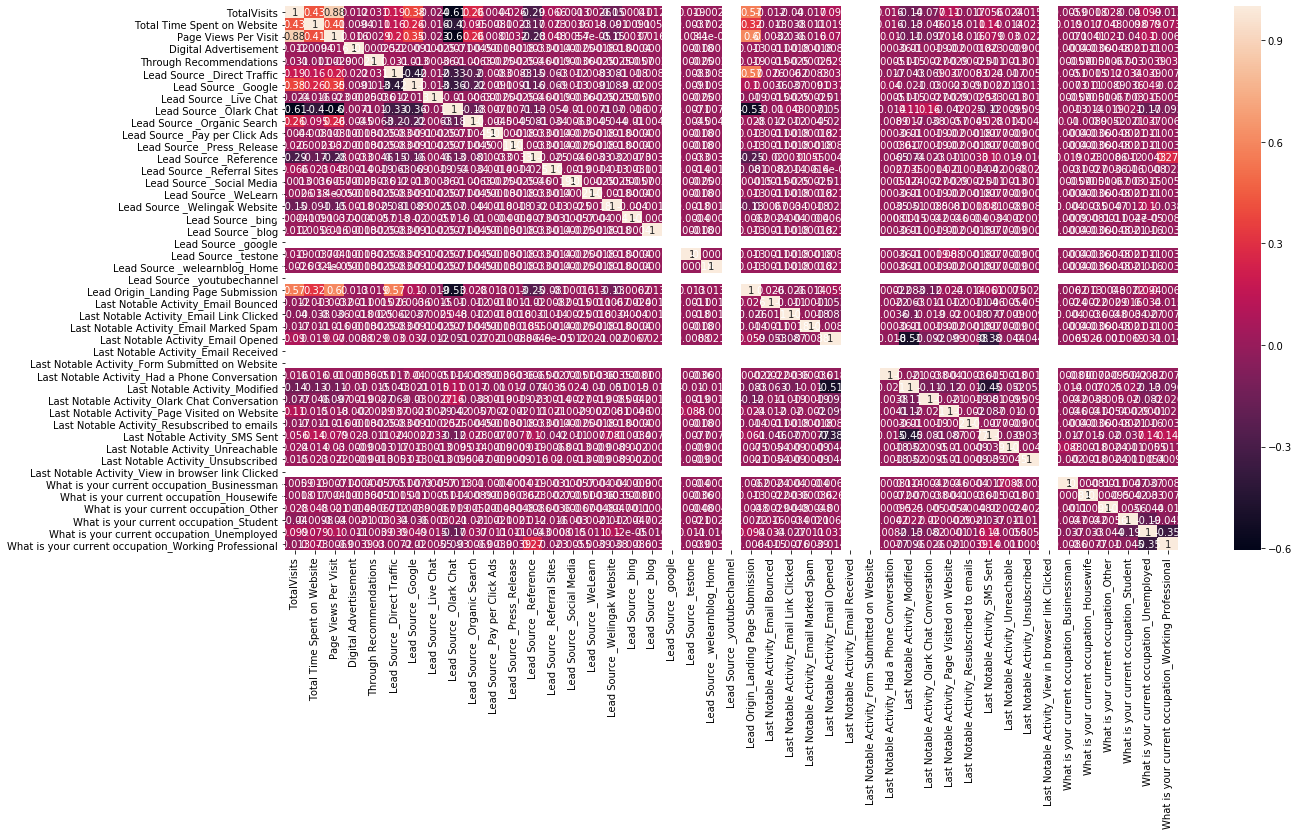

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train1.corr(),annot = True)

In [46]:
X_test2 = X_test1.drop  (['Lead Source _Olark Chat','Lead Source _Google','Lead Source _google','Lead Source _youtubechannel'],1)
X_train2 = X_train1.drop(['Lead Source _Olark Chat','Lead Source _Google','Lead Source _google','Lead Source _youtubechannel'],1)

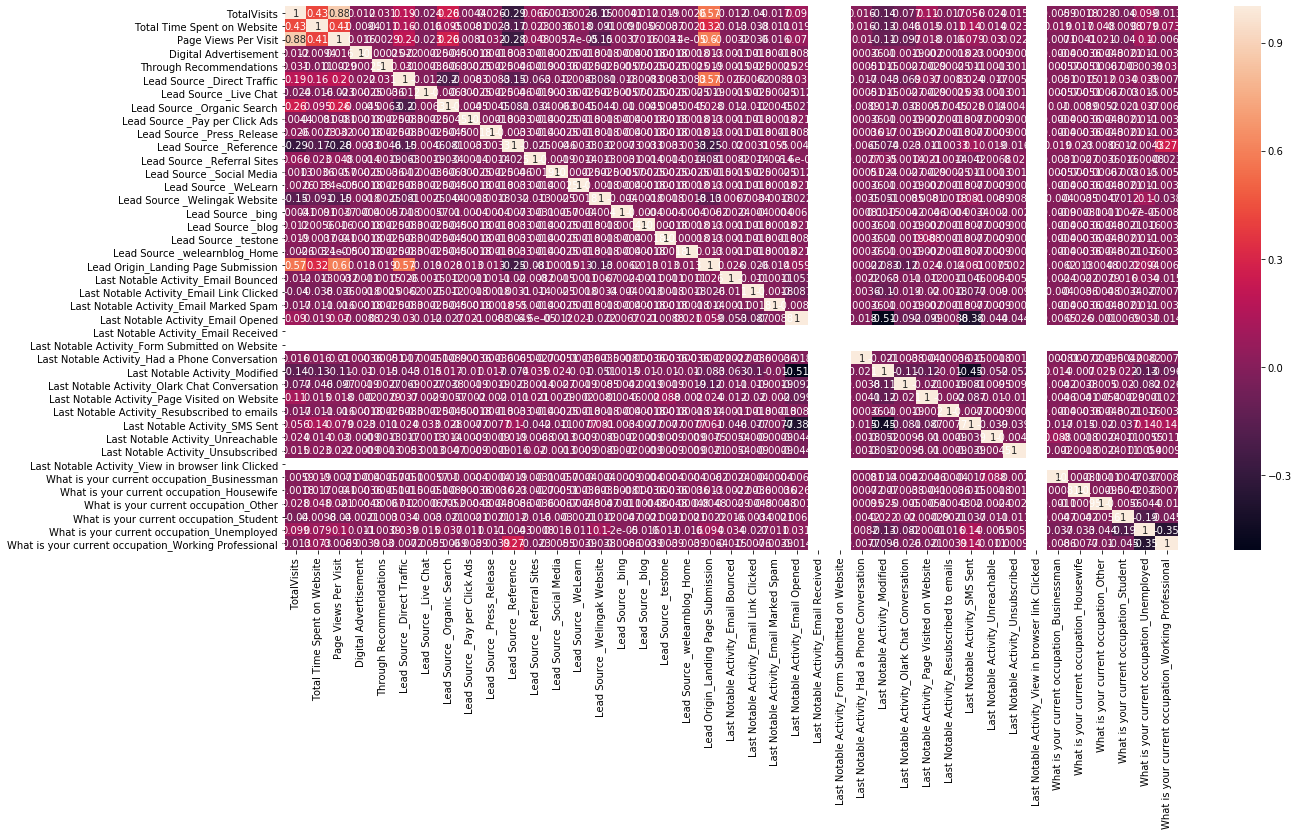

In [47]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [48]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5557
Model:                            GLM   Df Residuals:                     5518
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2240.3
Date:                Sun, 05 Jan 2020   Deviance:                       4480.5
Time:                        11:39:08   Pearson chi2:                 5.57e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.7136   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                              0.0947      0.078      1.218      0.223      -0.058       0.247
Total Time Spent on Website                              0.9998      0.042     23.839      0.000       0.918       1.082
Page Views Per Visit                                    -0.2913      0.079     -3.683      0.000      -0.446      -0.136
Digital Advertisement                                  -21.6964   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Through Recommendations                                  0.5105      1.733      0.295      0.768      -2.886       3.907
Lead Source _Direct Traffic                             -0.5631      0.105     -5.370      0.000      -0.769      -0.358
Lead Source _Live Chat                                  22.1339   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source _Organic Search                             -0.4999      0.133     -3.767      0.000      -0.760      -0.240
Lead Source _Pay per Click Ads                         -21.0508   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source _Press_Release                             -20.4332   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source _Reference                                   2.8858      0.240     12.002      0.000       2.415       3.357
Lead Source _Referral Sites                             -0.5696      0.372     -1.531      0.126      -1.299       0.159
Lead Source _Social Media                                1.1476      1.587      0.723      0.469      -1.962       4.257
Lead Source _WeLearn                                    21.9935   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source _Welingak Website                            5.3764      1.020      5.270      0.000       3.377       7.376
Lead Source _bing                                       -0.3622      1.233     -0.294      0.769      -2.778       2.054
Lead Source _blog                                      -20.7948   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source _testone                                   -21.1623   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source _welearnblog_Home                          -20.4708   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission                     -0.3762      0.113     -3.340      0.001      -0.597      -0.155
Last Notable Activity_Email Bounced                    -24.4431   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Email Link Clicked               -22

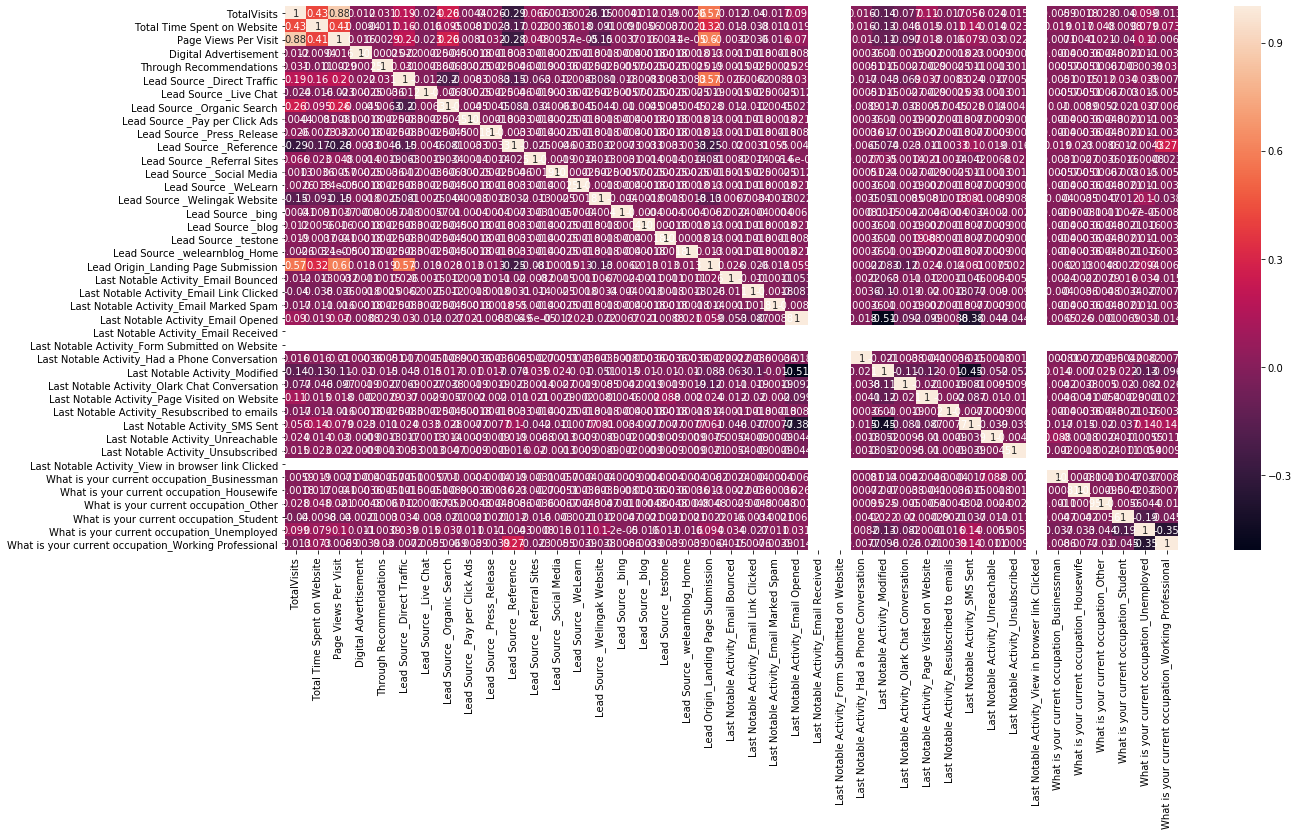

In [49]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

### Feature Selection Using RFE- 


In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True False False False  True False  True False False False  True
 False False False  True False False  True False False False False False
 False False  True False False  True False False False False False  True
 False  True False False  True  True False False False  True False False
  True  True]
[18  1 19 11 27  1 25  1 28 35 17  1 14 21  7  1 20 16  1  8 15 31 13 26
 36 12  1 24 30  1  9 29 23 32 33  1  5  1 10  3  1  1 22 34  6  1  2  4
  1  1]


In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Digital Advertisement', False, 11),
 ('Through Recommendations', False, 27),
 ('Lead Source _Direct Traffic', True, 1),
 ('Lead Source _Facebook', False, 25),
 ('Lead Source _Google', True, 1),
 ('Lead Source _Live Chat', False, 28),
 ('Lead Source _NC_EDM', False, 35),
 ('Lead Source _Olark Chat', False, 17),
 ('Lead Source _Organic Search', True, 1),
 ('Lead Source _Pay per Click Ads', False, 14),
 ('Lead Source _Press_Release', False, 21),
 ('Lead Source _Reference', False, 7),
 ('Lead Source _Referral Sites', True, 1),
 ('Lead Source _Social Media', False, 20),
 ('Lead Source _WeLearn', False, 16),
 ('Lead Source _Welingak Website', True, 1),
 ('Lead Source _bing', False, 8),
 ('Lead Source _blog', False, 15),
 ('Lead Source _google', False, 31),
 ('Lead Source _testone', False, 13),
 ('Lead Source _welearnblog_Home', False, 26),
 ('Lead Source _youtubechannel', False, 3

In [52]:
# Variables selected by RFE 
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source _Direct Traffic',
       'Lead Source _Google', 'Lead Source _Organic Search',
       'Lead Source _Referral Sites', 'Lead Source _Welingak Website',
       'Lead Origin_Lead Add Form', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Re-Running the Model

In [53]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5557
Model:                            GLM   Df Residuals:                     5541
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2260.4
Date:                Sun, 05 Jan 2020   Deviance:                       4520.7
Time:                        11:39:32   Pearson chi2:                 5.61e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3388      0.100    -13.369      0.000      -1.535      -1.142
Total Time Spent on Website                              1.0888      0.044     24.965      0.000       1.003       1.174
Lead Source _Direct Traffic                             -1.4629      0.120    -12.199      0.000      -1.698      -1.228
Lead Source _Google                                     -0.9902      0.115     -8.599      0.000      -1.216      -0.764
Lead Source _Organic Search                             -1.3779      0.151     -9.114      0.000      -1.674      -1.082
Lead Source _Referral Sites                             -1.3006      0.383     -3.396      0.001      -2.051      -0.550
Lead Source _Welingak Website                            2.4215      1.040      2.328      0.020       0.383       4.460
Lead Origin_Lead Add Form                                2.7686      0.233     11.859      0.000       2.311       3.226
Last Notable Activity_Email Bounced                     -1.8019      0.758     -2.377      0.017      -3.287      -0.316
Last Notable Activity_Had a Phone Conversation           2.3393      1.329      1.761      0.078      -0.265       4.943
Last Notable Activity_Olark Chat Conversation           -1.5581      0.432     -3.610      0.000      -2.404      -0.712
Last Notable Activity_SMS Sent                           1.7099      0.085     20.178      0.000       1.544       1.876
Last Notable Activity_Unreachable                        2.4108      0.545      4.424      0.000       1.343       3.479
What is your current occupation_Housewife               22.6669   1.34e+04      0.002      0.999   -2.62e+04    2.63e+04
What is your current occupation_Unemployed               1.0935      0.090     12.206      0.000       0.918       1.269
What is your current occupation_Working Professional     3.6629      0.209     17.560      0.000       3.254       4.072
========================================================================================================================
"""

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,2.59
2,Lead Source _Google,1.72
6,Lead Origin_Lead Add Form,1.72
1,Lead Source _Direct Traffic,1.60
10,Last Notable Activity_SMS Sent,1.45
14,What is your current occupation_Working Profes...,1.35
5,Lead Source _Welingak Website,1.32
3,Lead Source _Organic Search,1.23
0,Total Time Spent on Website,1.16
4,Lead Source _Referral Sites,1.02


In [56]:
col = col.drop('What is your current occupation_Housewife', 1)
X_train_sm1 = X_train_sm.drop(['What is your current occupation_Housewife'],1)
logm2 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5557
Model:                            GLM   Df Residuals:                     5542
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2265.5
Date:                Sun, 05 Jan 2020   Deviance:                       4531.0
Time:                        11:39:32   Pearson chi2:                 5.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3268      0.100    -13.291      0.000      -1.523      -1.131
Total Time Spent on Website                              1.0897      0.044     25.010      0.000       1.004       1.175
Lead Source _Direct Traffic                             -1.4568      0.120    -12.165      0.000      -1.692      -1.222
Lead Source _Google                                     -0.9836      0.115     -8.555      0.000      -1.209      -0.758
Lead Source _Organic Search                             -1.3761      0.151     -9.108      0.000      -1.672      -1.080
Lead Source _Referral Sites                             -1.3010      0.383     -3.399      0.001      -2.051      -0.551
Lead Source _Welingak Website                            2.4060      1.040      2.313      0.021       0.367       4.445
Lead Origin_Lead Add Form                                2.7899      0.233     11.954      0.000       2.332       3.247
Last Notable Activity_Email Bounced                     -1.8048      0.758     -2.381      0.017      -3.291      -0.319
Last Notable Activity_Had a Phone Conversation           2.3298      1.327      1.756      0.079      -0.270       4.930
Last Notable Activity_Olark Chat Conversation           -1.5642      0.432     -3.625      0.000      -2.410      -0.718
Last Notable Activity_SMS Sent                           1.7060      0.085     20.141      0.000       1.540       1.872
Last Notable Activity_Unreachable                        2.4035      0.545      4.412      0.000       1.336       3.471
What is your current occupation_Unemployed               1.0777      0.089     12.083      0.000       0.903       1.253
What is your current occupation_Working Professional     3.6464      0.208     17.496      0.000       3.238       4.055
========================================================================================================================
"""

In [57]:
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
X_train_sm2 = X_train_sm1.drop(['Last Notable Activity_Had a Phone Conversation'],1)
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5557
Model:                            GLM   Df Residuals:                     5543
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2267.3
Date:                Sun, 05 Jan 2020   Deviance:                       4534.6
Time:                        11:39:33   Pearson chi2:                 5.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3265      0.100    -13.291      0.000      -1.522      -1.131
Total Time Spent on Website                              1.0893      0.044     25.017      0.000       1.004       1.175
Lead Source _Direct Traffic                             -1.4560      0.120    -12.163      0.000      -1.691      -1.221
Lead Source _Google                                     -0.9765      0.115     -8.505      0.000      -1.202      -0.751
Lead Source _Organic Search                             -1.3753      0.151     -9.106      0.000      -1.671      -1.079
Lead Source _Referral Sites                             -1.3011      0.383     -3.399      0.001      -2.051      -0.551
Lead Source _Welingak Website                            2.4063      1.040      2.313      0.021       0.368       4.445
Lead Origin_Lead Add Form                                2.7895      0.233     11.954      0.000       2.332       3.247
Last Notable Activity_Email Bounced                     -1.8083      0.758     -2.385      0.017      -3.294      -0.322
Last Notable Activity_Olark Chat Conversation           -1.5665      0.432     -3.630      0.000      -2.412      -0.721
Last Notable Activity_SMS Sent                           1.7028      0.085     20.111      0.000       1.537       1.869
Last Notable Activity_Unreachable                        2.4001      0.545      4.404      0.000       1.332       3.468
What is your current occupation_Unemployed               1.0781      0.089     12.090      0.000       0.903       1.253
What is your current occupation_Working Professional     3.6439      0.208     17.486      0.000       3.236       4.052
========================================================================================================================
"""

In [58]:
col = col.drop('Lead Source _Welingak Website', 1)
X_train_sm3 = X_train_sm2.drop(['Lead Source _Welingak Website'],1)
logm2 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5557
Model:                            GLM   Df Residuals:                     5544
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2272.7
Date:                Sun, 05 Jan 2020   Deviance:                       4545.3
Time:                        11:39:33   Pearson chi2:                 5.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3316      0.100    -13.334      0.000      -1.527      -1.136
Total Time Spent on Website                              1.0891      0.044     25.020      0.000       1.004       1.174
Lead Source _Direct Traffic                             -1.4558      0.120    -12.163      0.000      -1.690      -1.221
Lead Source _Google                                     -0.9763      0.115     -8.504      0.000      -1.201      -0.751
Lead Source _Organic Search                             -1.3745      0.151     -9.102      0.000      -1.671      -1.079
Lead Source _Referral Sites                             -1.3002      0.383     -3.397      0.001      -2.050      -0.550
Lead Origin_Lead Add Form                                3.1052      0.225     13.774      0.000       2.663       3.547
Last Notable Activity_Email Bounced                     -1.6245      0.688     -2.361      0.018      -2.973      -0.276
Last Notable Activity_Olark Chat Conversation           -1.5117      0.420     -3.597      0.000      -2.335      -0.688
Last Notable Activity_SMS Sent                           1.7055      0.085     20.157      0.000       1.540       1.871
Last Notable Activity_Unreachable                        2.3995      0.546      4.399      0.000       1.330       3.469
What is your current occupation_Unemployed               1.0831      0.089     12.132      0.000       0.908       1.258
What is your current occupation_Working Professional     3.6370      0.209     17.433      0.000       3.228       4.046
========================================================================================================================
"""

In [59]:
 col = col.drop('Last Notable Activity_Email Bounced', 1)
X_train_sm4 = X_train_sm3.drop(['Last Notable Activity_Email Bounced'],1)
logm2 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5557
Model:                            GLM   Df Residuals:                     5545
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2276.4
Date:                Sun, 05 Jan 2020   Deviance:                       4552.8
Time:                        11:39:33   Pearson chi2:                 5.73e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3354      0.100    -13.373      0.000      -1.531      -1.140
Total Time Spent on Website                              1.0893      0.043     25.042      0.000       1.004       1.175
Lead Source _Direct Traffic                             -1.4613      0.120    -12.216      0.000      -1.696      -1.227
Lead Source _Google                                     -0.9781      0.115     -8.526      0.000      -1.203      -0.753
Lead Source _Organic Search                             -1.3707      0.151     -9.080      0.000      -1.667      -1.075
Lead Source _Referral Sites                             -1.2928      0.383     -3.378      0.001      -2.043      -0.543
Lead Origin_Lead Add Form                                3.1004      0.225     13.781      0.000       2.659       3.541
Last Notable Activity_Olark Chat Conversation           -1.5030      0.420     -3.578      0.000      -2.326      -0.680
Last Notable Activity_SMS Sent                           1.7168      0.085     20.310      0.000       1.551       1.882
Last Notable Activity_Unreachable                        2.4085      0.545      4.416      0.000       1.340       3.478
What is your current occupation_Unemployed               1.0763      0.089     12.062      0.000       0.901       1.251
What is your current occupation_Working Professional     3.6273      0.208     17.462      0.000       3.220       4.034
========================================================================================================================
"""

In [60]:
X_test[col].shape
#res = modres.predict(X_test[col])

(2382, 11)

### Making Predictions

In [61]:
y_train_pred = res.predict(X_train_sm4).values.reshape(-1)

In [62]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.095610
1,0,0.087615
2,1,0.497589
3,0,0.095610
4,0,0.022978


In [63]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
8448,0
8862,1
6904,0
7276,0
4117,0


In [64]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.095610,0
1,0,0.087615,0
2,1,0.497589,0
3,0,0.095610,0
4,0,0.022978,0


### Model Evaluation

In [65]:
from sklearn import metrics

In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3103,  377],
       [ 647, 1430]], dtype=int64)

In [67]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8157279107432067


In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

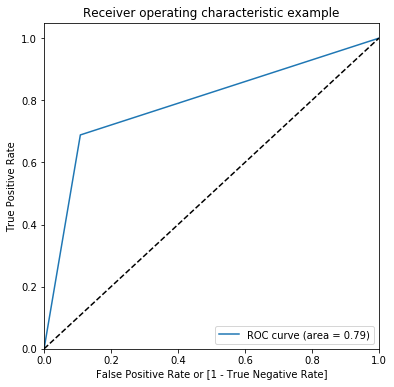

(array([0.        , 0.10833333, 1.        ]),
 array([0.        , 0.68849302, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [69]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [70]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

'0.79'

###### Step 10: Finding Optimal Cutoff Point

In [71]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.095610,0,1,0,0,0,0,0,0,0,0,0
1,0,0.087615,0,1,0,0,0,0,0,0,0,0,0
2,1,0.497589,0,1,1,1,1,1,0,0,0,0,0
3,0,0.095610,0,1,0,0,0,0,0,0,0,0,0
4,0,0.022978,0,1,0,0,0,0,0,0,0,0,0


In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373763  1.000000  0.000000
0.1   0.1  0.642793  0.963409  0.451437
0.2   0.2  0.756163  0.911411  0.663506
0.3   0.3  0.802951  0.828117  0.787931
0.4   0.4  0.813029  0.755898  0.847126
0.5   0.5  0.815728  0.688493  0.891667
0.6   0.6  0.810149  0.617236  0.925287
0.7   0.7  0.786216  0.507463  0.952586
0.8   0.8  0.767680  0.425614  0.971839
0.9   0.9  0.718553  0.267212  0.987931


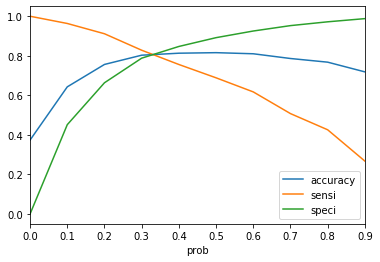

In [73]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [74]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.095610,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.087615,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.497589,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.095610,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.022978,0,1,0,0,0,0,0,0,0,0,0,0


In [75]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8085297822566133

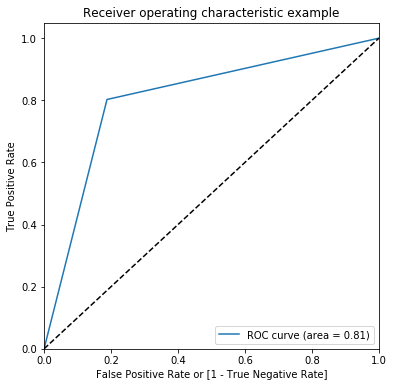

(array([0.        , 0.18793103, 1.        ]),
 array([0.       , 0.8025999, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [76]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [77]:
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

'0.81'

### We see an overall AUC score of 0.81 looks like we did a decent job.


In [78]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted )
confusion2

array([[2826,  654],
       [ 410, 1667]], dtype=int64)

In [79]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8025999037072701

In [81]:
# Let us calculate specificity
TN / float(TN+FP)

0.8120689655172414

In [82]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1879310344827586


In [83]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7182249030590263


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8733003708281829


###### Precision and recall tradeoff

In [85]:
from sklearn.metrics import precision_score, recall_score

In [86]:
from sklearn.metrics import precision_recall_curve

In [87]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      1
 13      0
 14      0
 15      0
 16      1
 17      0
 18      1
 19      1
 20      0
 21      1
 22      1
 23      1
 24      0
 25      0
 26      0
 27      1
 28      0
 29      0
        ..
 5527    0
 5528    0
 5529    0
 5530    0
 5531    0
 5532    0
 5533    0
 5534    0
 5535    1
 5536    1
 5537    0
 5538    0
 5539    1
 5540    0
 5541    0
 5542    0
 5543    0
 5544    0
 5545    0
 5546    0
 5547    1
 5548    1
 5549    0
 5550    0
 5551    1
 5552    0
 5553    1
 5554    0
 5555    1
 5556    1
 Name: Converted, Length: 5557, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      1
 13      0
 14      0
 15      1
 16      1
 17      0
 18      1
 19      1
 20      1
 21      0
 22      1
 23      0
 24      0
 25      

In [88]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7913669064748201

In [90]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6884930187770824

In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

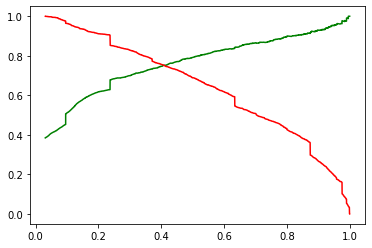

In [92]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [93]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [94]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source _Direct Traffic,Lead Source _Google,Lead Source _Organic Search,Lead Source _Referral Sites,Lead Origin_Lead Add Form,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8448,-0.816459,0,1,0,0,0,0,0,0,0,0
8862,1.883583,1,0,0,0,0,0,0,0,1,0
6904,-0.836858,0,0,0,0,0,0,0,0,0,0
7276,0.351828,0,1,0,0,0,0,0,0,0,0
4117,-0.836858,0,0,0,0,0,1,0,0,0,0


In [95]:
X_test_sm = sm.add_constant(X_test)

In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

8448    0.039057
8862    0.582086
6904    0.095610
7276    0.126716
4117    0.022978
6728    0.851340
6889    0.095610
4887    0.153577
3191    0.314480
8632    0.370476
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
# Let's see the head
y_pred_1.head()

,0
8448,0.039057
8862,0.582086
6904,0.095610
7276,0.126716
4117,0.022978


In [100]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [101]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [102]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [103]:
y_pred_final.head()

,Converted,Converted_Prob
8448,0,0.039057
8862,1,0.582086
6904,0,0.095610
7276,0,0.126716
4117,0,0.022978


In [112]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [113]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1232,  286],
       [ 203,  661]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7650462962962963

In [116]:
TN / float(TN+FP)

0.8115942028985508

In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7947103274559194

In [118]:
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

'0.81'

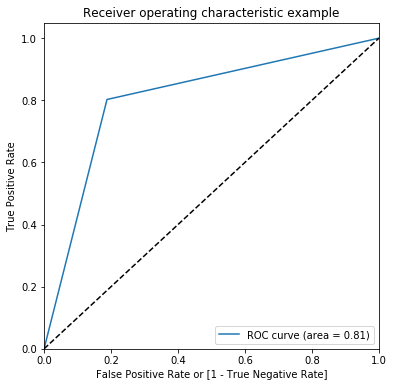

(array([0.        , 0.18793103, 1.        ]),
 array([0.       , 0.8025999, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [119]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

#### We can see the accuracy in test data set is almost 80% which is good, AUC is 81%.
This model is good model